In [1]:
# performs basic exploratory data analysis (EDA) on the flood dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Load the dataset
print("Loading the data and performing EDA.")
data = pd.read_csv('flood_risk_dataset_india.csv') 

Loading the data and performing EDA.


In [3]:
print("1. Dataset Shape (Rows, Columns):", data.shape)
print("\n2. Column Data Types:")
print(data.dtypes)
print("\n3. First 5 rows:")
print(data.head())

1. Dataset Shape (Rows, Columns): (10000, 14)

2. Column Data Types:
Latitude                  float64
Longitude                 float64
Rainfall (mm)             float64
Temperature (°C)          float64
Humidity (%)              float64
River Discharge (m³/s)    float64
Water Level (m)           float64
Elevation (m)             float64
Land Cover                 object
Soil Type                  object
Population Density        float64
Infrastructure              int64
Historical Floods           int64
Flood Occurred              int64
dtype: object

3. First 5 rows:
    Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
1  35.570715  77.654451      55.353599         28.778774     27.585422   
2  29.227824  73.108463     103.991908         43.934956     30.108738   
3  25.361096  85.610733     198.984191         21.569354     34.453690   
4  12.524541  81.822101     144.626803         32.635

 Checking for missing values

In [4]:
print("\n4. Missing Values:")
print(data.isnull().sum())


4. Missing Values:
Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64


In [5]:
# 3. Analyze the Target Variable
print("\n5. Distribution of Target Variable ('Flood'):")
target_counts = data['Flood Occurred'].value_counts() 
print(target_counts)


5. Distribution of Target Variable ('Flood'):
Flood Occurred
1    5057
0    4943
Name: count, dtype: int64


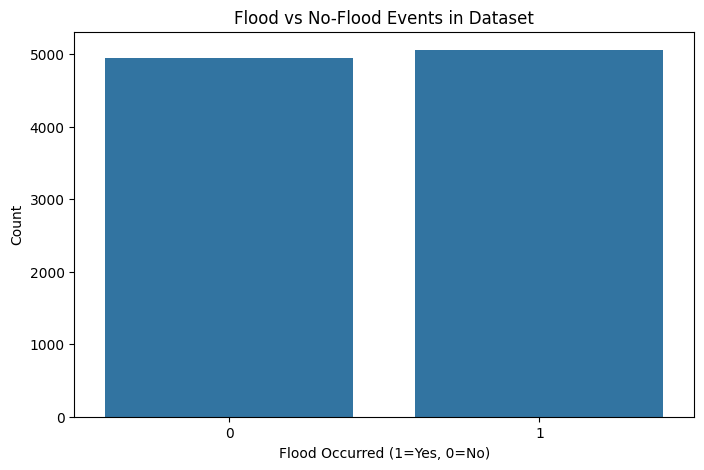

In [6]:
# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Flood vs No-Flood Events in Dataset')
plt.xlabel('Flood Occurred (1=Yes, 0=No)')
plt.ylabel('Count')
plt.savefig('target_distribution.png') 
plt.show()

In [7]:
#  Check Data Distributions for Numerical Features
print("\n6. Generating distribution plots for numerical features..")


6. Generating distribution plots for numerical features..


In [8]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('Flood Occurred')

In [9]:
# Clean numerical features
for feature in numerical_features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

In [10]:
data = data.dropna(subset=numerical_features)

In [11]:
import re

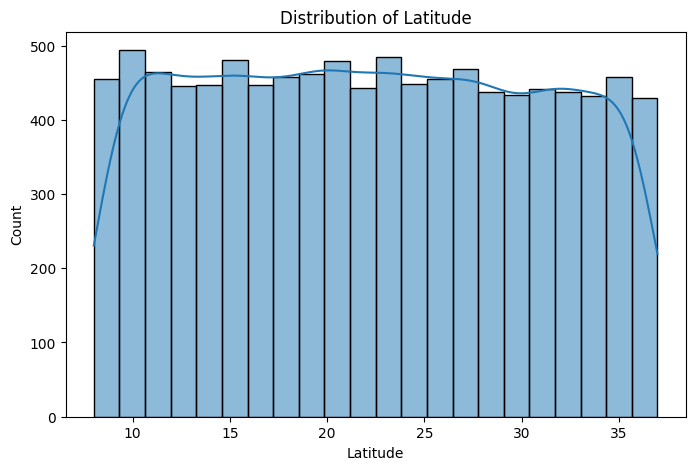

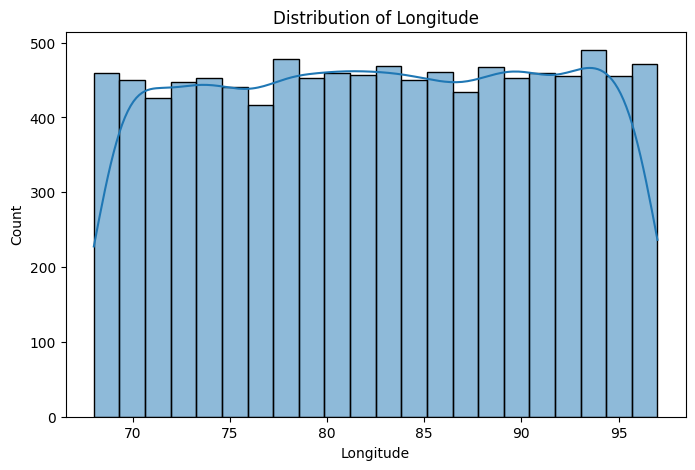

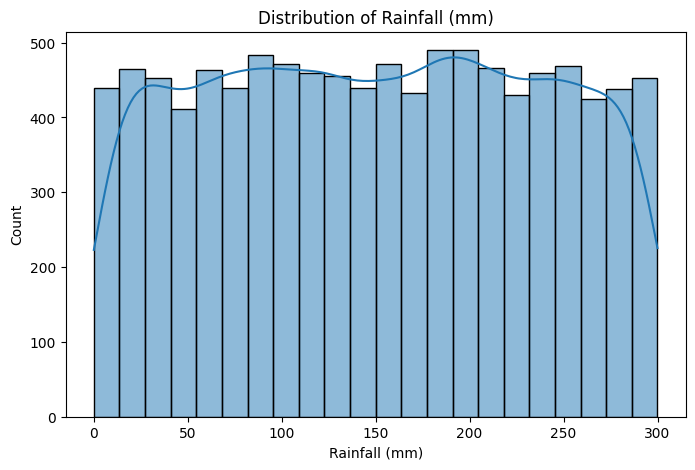

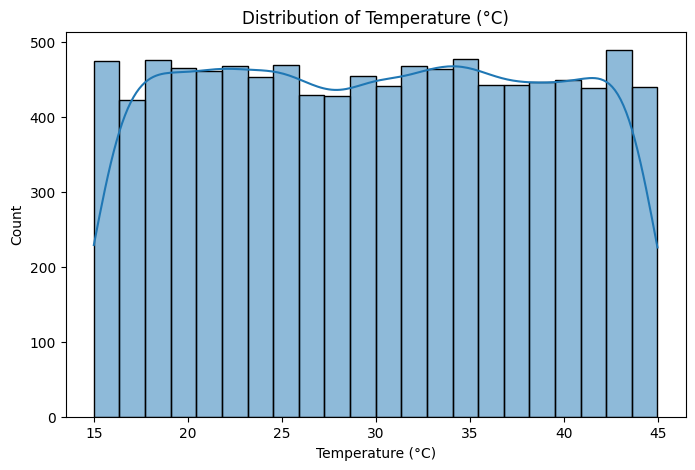

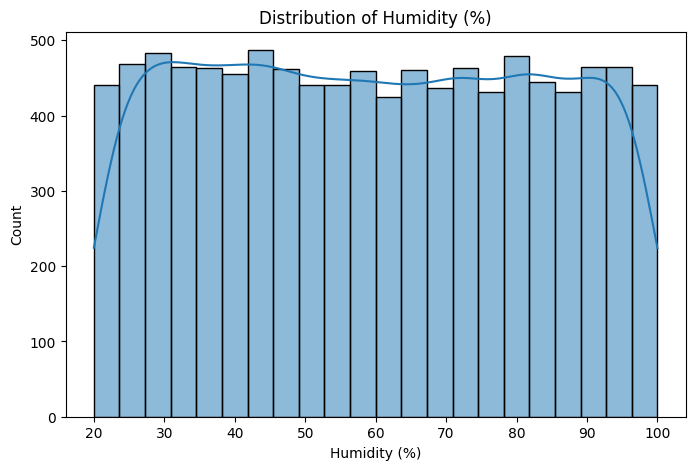

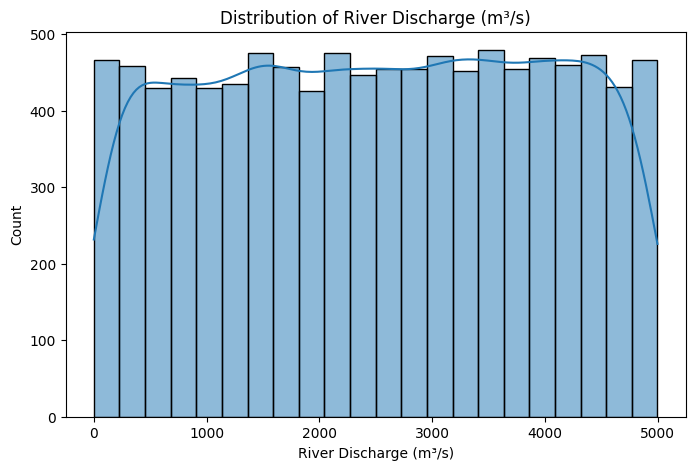

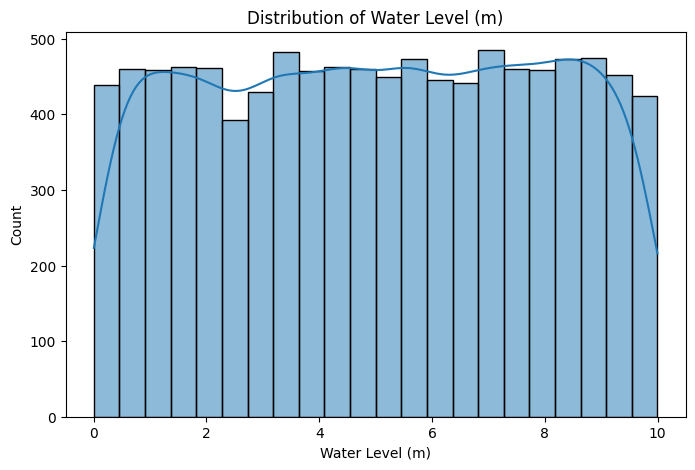

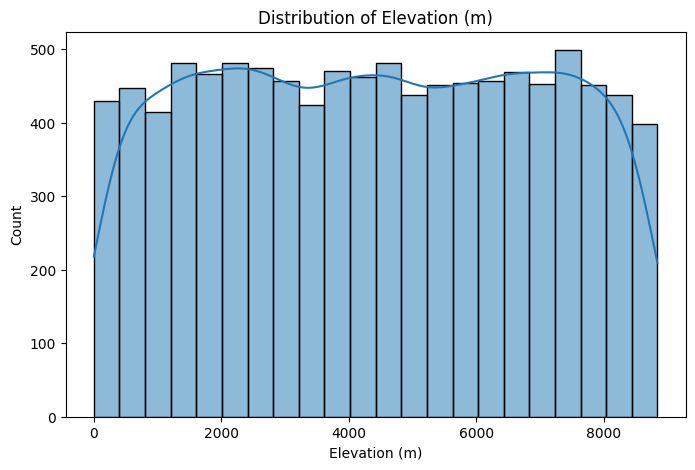

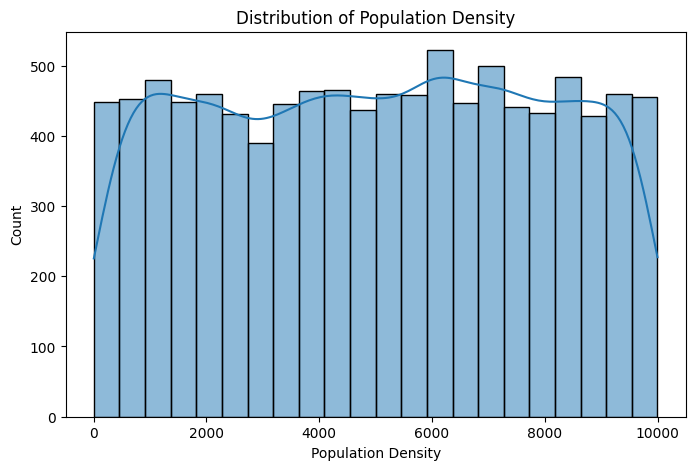

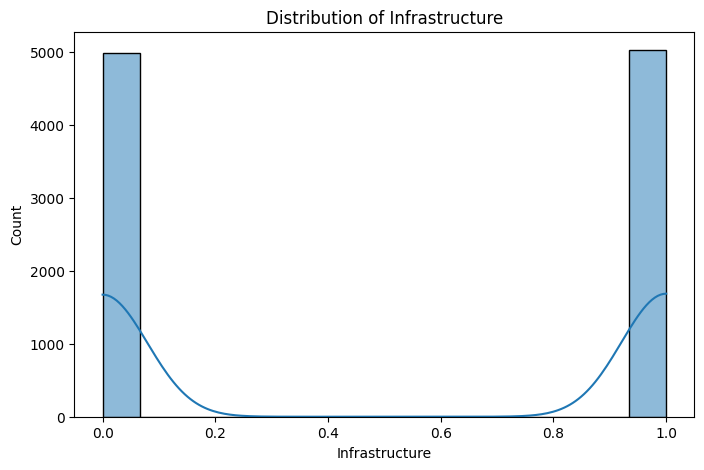

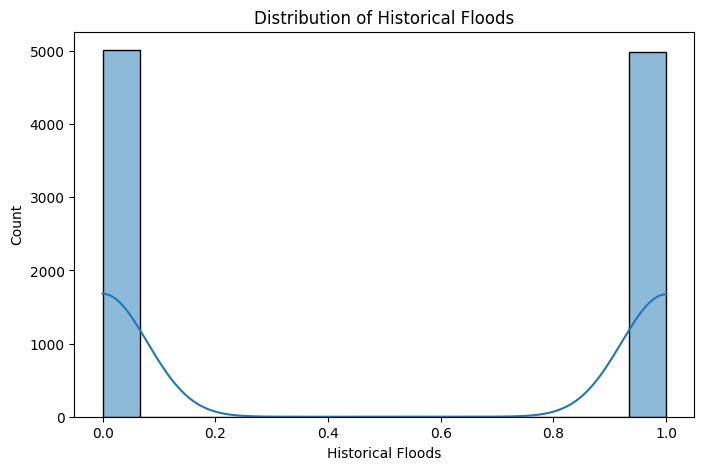

In [12]:
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True) 
    plt.title(f'Distribution of {feature}')
    safe_feature = re.sub(r'[^a-zA-Z0-9]', '_', feature)
    plt.savefig(f'dist_{safe_feature}.png') 
    plt.show()

In [13]:
# Correlation Heatmap 
print("\n7. Generating Correlation Heatmap.")
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()


7. Generating Correlation Heatmap.


<Figure size 1200x800 with 0 Axes>

<Axes: >

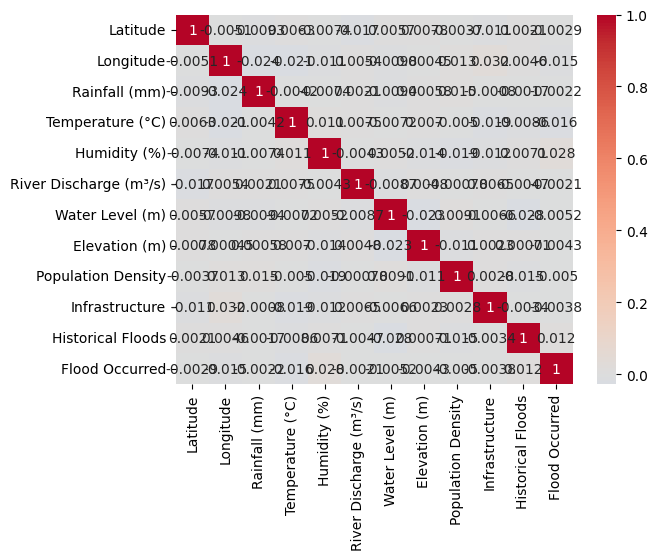

In [14]:
# Creating a heatmap
sns.heatmap(correlation_matrix,
            annot=True, 
            cmap='coolwarm', 
            center=0) 

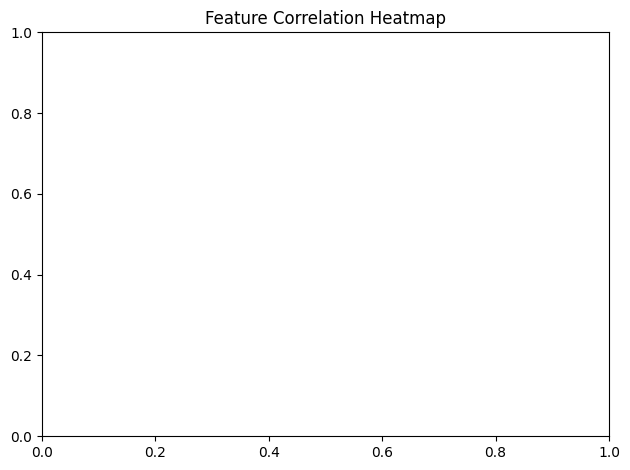

In [15]:
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=100) 
plt.show()

In [16]:
print("\nEDA Completed.")


EDA Completed.
